#### - Sobhan Moradian Daghigh
#### - 12/30/2021
#### - PR - EX02 - Q4 - All Parts

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom
from matplotlib.ticker import MaxNLocator
from itertools import combinations

In [15]:
datas = [0, 2, 0, 3, 1, 2, 2, 2, 0, 2, 3, 1, 0, 0, 2, 3, 3, 2, 3, 0]
dataset = pd.DataFrame({'data': datas})
dataset.head()

,data
0,0
1,2
2,0
3,3
4,1


### Part A.


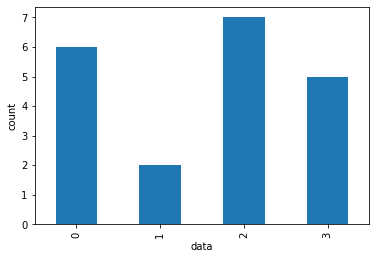

In [20]:
dataset.groupby('data').size().plot(kind='bar', ylabel='count')
plt.show()

### Part B.

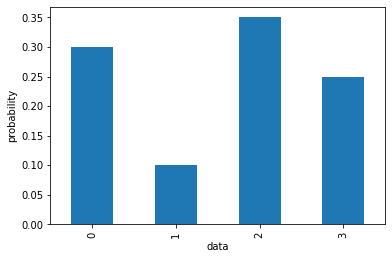

In [22]:
dataset.groupby('data').apply(lambda x: np.divide(len(x), dataset.shape[0])).plot(kind='bar', ylabel='probability')
sns.distplot(dataset.groupby('data').apply(lambda x: np.divide(len(x), dataset.shape[0])), label="SUV")

plt.show()

### Part C.

In [204]:
states = [(5, 0.2), (10, 0.3), (20, 0.1)]

In [180]:
def get_binom_pmf(N, p):
    num = range(20)
    dist = [binom.pmf(r, N, p) for r in num]
    return dist

In [219]:
def plotter(data, N, p):
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    ax[0].bar(range(10), data[:10], width=0.7)
    ax[1].plot(data[:10])
    ax[1].legend(['N={}, p={}'.format(N, p)])
    ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))    

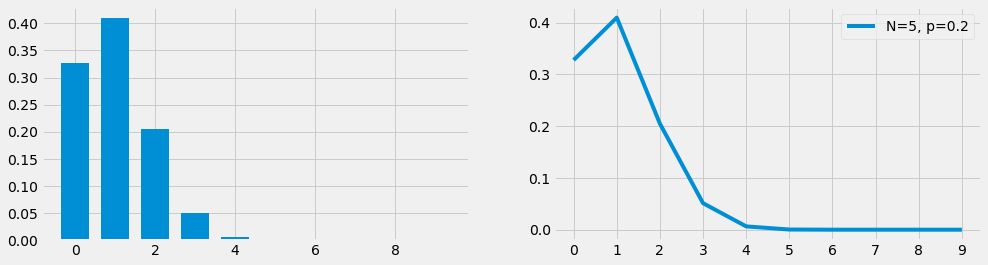

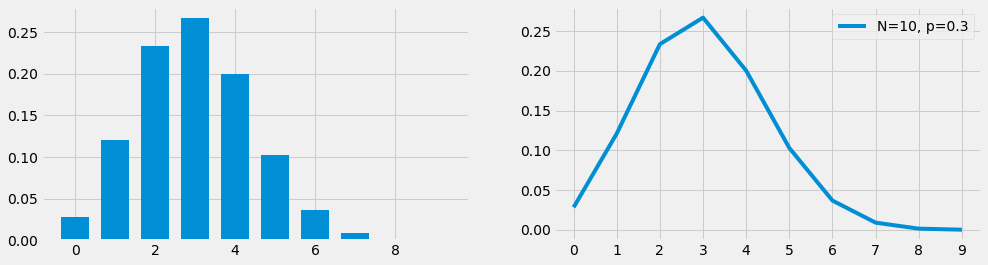

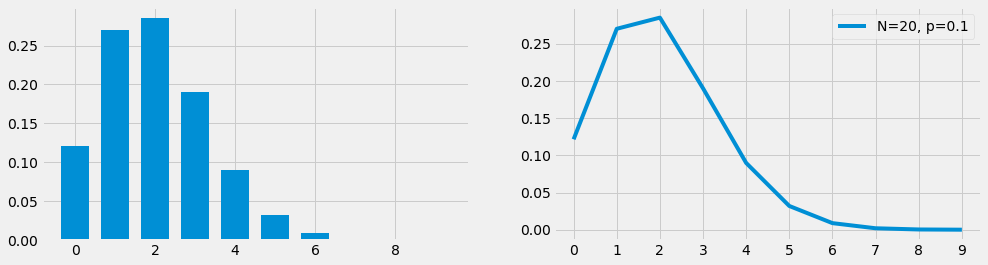

In [220]:
with plt.style.context('fivethirtyeight'):
    for state in states:
        plotter(get_binom_pmf(*state), state[0], state[1])

### Part D.

#### The main plot


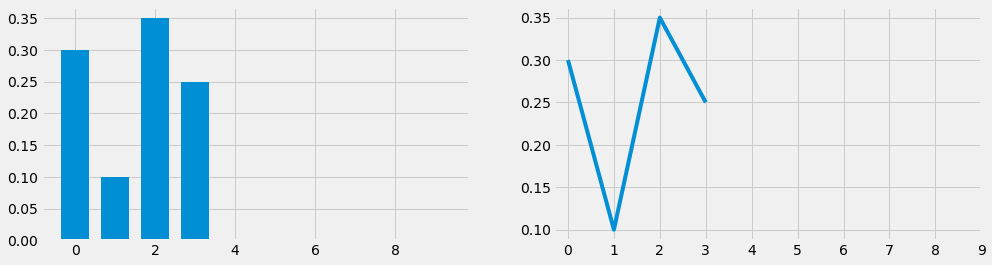

In [244]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    data = dataset.groupby('data').apply(lambda x: np.divide(len(x), dataset.shape[0]))
    ax[0].bar(range(10), data.tolist() + ([0] * 6), width=0.7)
    ax[1].plot(data)
    ax[1].axis(xmin=-0.3,xmax=9)
    ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[1].xaxis.set_major_locator(MaxNLocator(integer=True)) 

### Part E.

In [336]:
def get_likelihood_and_log(N, datas):
    
    p = 0.2
    likelihood = 1
    logLikelihood = 0
        
    for data in datas:
        combination = len(list(combinations(range(1, N + 1), data)))
        
        likelihood = np.multiply(likelihood, 
                                 np.multiply(combination, 
                                             np.multiply(np.power(p, data), 
                                                        np.power((1 - p), (N - data)))))
        
        log_cmb = 0 if combination == 0 else np.log(combination)
        logLikelihood = np.add(logLikelihood, 
                               np.add(log_cmb, 
                                      np.add(np.multiply(data, np.log(p)), 
                                             np.multiply((N - data), np.log(1 - p)))))
        
    return likelihood, logLikelihood    

In [337]:
likelihoods = []
logLikelihoods = []
for x in range(1, 20):
    temp = get_likelihood_and_log(x, datas)
    likelihoods.append(temp[0])
    logLikelihoods.append(temp[1])

#### Plot Likelihood

Text(0, 0.5, 'p(x|N)')

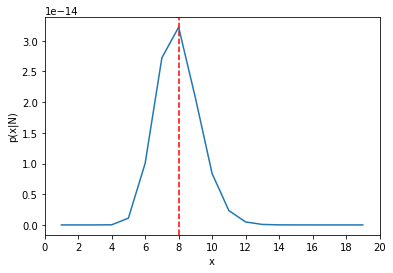

In [338]:
x = range(1, 20)
plt.plot(x , likelihoods)
plt.axvline(x = np.argmax(likelihoods) + 1, color = 'r', linestyle = '--') 
plt.xlim(0, 20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("x")
plt.ylabel("p(x|N)")

### Part F.

#### Plot LogLikelihood

Text(0, 0.5, 'p(x|N)')

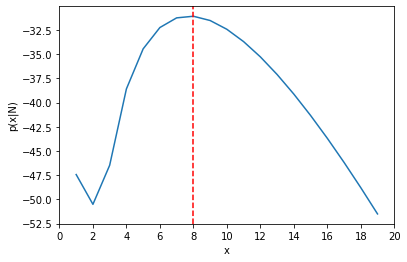

In [339]:
x = range(1, 20)
plt.plot(x , logLikelihoods)
plt.axvline(x = np.argmax(logLikelihoods) + 1, color = 'r', linestyle = '--') 
plt.xlim(0, 20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("x")
plt.ylabel("p(x|N)")

### Part G.

In [343]:
print("Best N: ", np.argmax(logLikelihoods) + 1) # Because of indexing from 0, we plus 1 to it

Best N:  8
